# About the Data
We have two datasets, the first contains information about clothing, shoes and jewelry products and the second contains information about the reviews of these products. The data was collected from Amazon.com.
### Clothing, Shoes and Jewelry Meta Data
This dataset contains 1,503,384 products and  9 features which are
- asin: ID of the product, e.g. 0000031852
- title: Name of the product
- description: Description of the product
- price: Price in US dollars (at time of crawl)
- imUrl: url of the product image
- related: Related products (also bought, also viewed, bought together, buy after viewing)
- salesRank: Sales rank information of a product within its main category
- brand: Brand name
### Clothing, Shoes and Jewelry Review Data
Our second dataset contains 5,748,920 reviews and 10 features which are
- reviewerID: ID of the reviewer, e.g. A2SUAM1J3GNN3B
- asin: ID of the product, e.g. 0000013714
- reviewerName: name of the reviewer
- helpful: helpfulness rating of the review, e.g. 2/3
- reviewText: text of the review
- overall: rating of the product
- summary: summary of the review
- unixReviewTime: time of the review (unix time)
- reviewTime: time of the review (raw)
- image: images that users post after they have received the product


# Objective
The objective of this notebook is to build a sentiment analysis model that can predict the sentiment of a review. We will use the reviewText feature from the Clothing, Shoes and Jewelry Review Data dataset to train our model. We will use the overall feature as our target variable. We will use the following steps to build our model:
- Data Preprocessing
- Model Building
- Model Evaluation
- Conclusion

In [14]:
import pandas as pd
import gzip
import itertools


In [15]:
import tensorflow as tf


# Data Preprocessing

### Data import

In [16]:
FILE_PATH_1 = "../unsupervisedText/meta_Clothing_Shoes_and_Jewelry.jsonl.gz"

with gzip.open(FILE_PATH_1, "rt") as file:
    lines = file.readlines()
data = [eval(line) for line in lines]
products = pd.DataFrame(data)
products.head()

# time to excute 3m 25.1s


,asin,related,title,price,salesRank,imUrl,brand,categories,description
0,0000037214,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...",Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,6.99,{'Clothing': 1233557},http://ecx.images-amazon.com/images/I/31mCncNu...,Big Dreams,"[[Clothing, Shoes & Jewelry, Girls], [Clothing...",NaN
1,0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...
2,0123456479,"{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...",SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,64.98,{'Kitchen & Dining': 16987},http://ecx.images-amazon.com/images/I/413tGhqo...,NaN,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",Elegance par excellence. Hand-crafted of the f...
3,0456844570,"{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...",RiZ Women's Beautify Crafted &frac12; Rimmed F...,NaN,{'Clothing': 1180499},http://ecx.images-amazon.com/images/I/31QZTHxv...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN
4,0456808574,"{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '...",Lantin White Visor Wrap Around Ski Style Aviat...,NaN,{'Clothing': 1038084},http://ecx.images-amazon.com/images/I/31UsrgT5...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN


In [17]:
products.shape

(1503384, 9)

In [18]:
FILE_PATH_2 = "../unsupervisedText/reviews_Clothing_Shoes_and_Jewelry.json.gz"

with gzip.open(FILE_PATH_2, "rt") as file:
    lines = file.readlines()
data = [eval(line) for line in lines]
reviews = pd.DataFrame(data)
reviews.head()

# time to excute 3m 41.9s

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2XVJBSRI3SWDI,0000031887,abigail,"[0, 0]",Perfect red tutu for the price. I baught it as...,5.0,Nice tutu,1383523200,"11 4, 2013"
1,A2G0LNLN79Q6HR,0000031887,"aj_18 ""Aj_18""","[1, 1]",This was a really cute tutu the only problem i...,4.0,Really Cute but rather short.,1337990400,"05 26, 2012"
2,A2R3K1KX09QBYP,0000031887,alert consumer,"[1, 1]",the tutu color was very nice. the only issue w...,2.0,not very good material.,1361059200,"02 17, 2013"
3,A19PBP93OF896,0000031887,"Alinna Satake ""Can't Stop Eating""","[0, 1]",My 3-yr-old daughter received this as a gift f...,1.0,Tiny and Poorly Constructed!,1363824000,"03 21, 2013"
4,A1P0IHU93EF9ZK,0000031887,Amanda,"[0, 0]",Bought it for my daughters first birthday whic...,4.0,i love it,1390435200,"01 23, 2014"


### Combine the two datasets using ASIN as the key


In [19]:
products = products.set_index('asin')
reviews = reviews.set_index('asin')
df = reviews.join(products, how='inner')
df.head()

,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,related,title,price,salesRank,imUrl,brand,categories,description
asin,,,,,,,,,,,,,,,,
0000031887,A2XVJBSRI3SWDI,abigail,"[0, 0]",Perfect red tutu for the price. I baught it as...,5.0,Nice tutu,1383523200,"11 4, 2013","{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...
0000031887,A2G0LNLN79Q6HR,"aj_18 ""Aj_18""","[1, 1]",This was a really cute tutu the only problem i...,4.0,Really Cute but rather short.,1337990400,"05 26, 2012","{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...
0000031887,A2R3K1KX09QBYP,alert consumer,"[1, 1]",the tutu color was very nice. the only issue w...,2.0,not very good material.,1361059200,"02 17, 2013","{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...
0000031887,A19PBP93OF896,"Alinna Satake ""Can't Stop Eating""","[0, 1]",My 3-yr-old daughter received this as a gift f...,1.0,Tiny and Poorly Constructed!,1363824000,"03 21, 2013","{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...
0000031887,A1P0IHU93EF9ZK,Amanda,"[0, 0]",Bought it for my daughters first birthday whic...,4.0,i love it,1390435200,"01 23, 2014","{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...


In [20]:
df = df.reset_index()
df.head()

,asin,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,related,title,price,salesRank,imUrl,brand,categories,description
0,0000031887,A2XVJBSRI3SWDI,abigail,"[0, 0]",Perfect red tutu for the price. I baught it as...,5.0,Nice tutu,1383523200,"11 4, 2013","{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...
1,0000031887,A2G0LNLN79Q6HR,"aj_18 ""Aj_18""","[1, 1]",This was a really cute tutu the only problem i...,4.0,Really Cute but rather short.,1337990400,"05 26, 2012","{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...
2,0000031887,A2R3K1KX09QBYP,alert consumer,"[1, 1]",the tutu color was very nice. the only issue w...,2.0,not very good material.,1361059200,"02 17, 2013","{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...
3,0000031887,A19PBP93OF896,"Alinna Satake ""Can't Stop Eating""","[0, 1]",My 3-yr-old daughter received this as a gift f...,1.0,Tiny and Poorly Constructed!,1363824000,"03 21, 2013","{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...
4,0000031887,A1P0IHU93EF9ZK,Amanda,"[0, 0]",Bought it for my daughters first birthday whic...,4.0,i love it,1390435200,"01 23, 2014","{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...


## Drop Duplicates

In [21]:
df.drop_duplicates(subset=['asin'], keep='first')

,asin,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,related,title,price,salesRank,imUrl,brand,categories,description
0,0000031887,A2XVJBSRI3SWDI,abigail,"[0, 0]",Perfect red tutu for the price. I baught it as...,5.0,Nice tutu,1383523200,"11 4, 2013","{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...
236,0000037214,ARTHT19OB79VZ,Natalie,"[1, 1]",Way smaller. Fits infant but not up to 7 my da...,1.0,:(,1389571200,"01 13, 2014","{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...",Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,6.99,{'Clothing': 1233557},http://ecx.images-amazon.com/images/I/31mCncNu...,Big Dreams,"[[Clothing, Shoes & Jewelry, Girls], [Clothing...",NaN
237,0123456479,A2H34UBQY7SN9Q,A. C. Patrut,"[0, 0]",Very simple...I love it because she loves it. ...,5.0,Good,1368835200,"05 18, 2013","{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...",SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,64.98,{'Kitchen & Dining': 16987},http://ecx.images-amazon.com/images/I/413tGhqo...,NaN,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",Elegance par excellence. Hand-crafted of the f...
315,0456787283,A1KI7OVGTVEMPJ,disneybound,"[1, 1]",I bought these with hopes they would not have ...,1.0,still too large,1363392000,"03 16, 2013","{'also_viewed': ['B00AIPLH22', 'B005P1H8KO', '...",FX1 Small Adult Aviator Sunglasses with Silver...,NaN,{'Clothing': 456854},http://ecx.images-amazon.com/images/I/31dS6eGu...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN
316,0456808574,A2EG5K051HXX62,JanVan,"[0, 0]",Love these. Very sporty and great price. The...,5.0,Great looking,1398643200,"04 28, 2014","{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '...",Lantin White Visor Wrap Around Ski Style Aviat...,NaN,{'Clothing': 1038084},http://ecx.images-amazon.com/images/I/31UsrgT5...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5748902,B00LT2HE7A,A2723S3UN0Q50K,Paul Ramon,"[0, 0]",My girlfriend has bought a few dresses from th...,5.0,Awesome Dress,1405900800,"07 21, 2014",{'also_viewed': ['B00E63GYSY']},Musical Holiday Women's Sateen Bridal Wedding ...,65.00,{'Clothing': 177976},http://ecx.images-amazon.com/images/I/31ZsEvg4...,NaN,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",NaN
5748903,B00LU0ZXJM,A1H04CRIJ2ASD6,Jackie Carlson,"[1, 1]",Fits perfecty and washes up very nice slight s...,5.0,comfortable wrap great for after shower or pool!,1405382400,"07 15, 2014",NaN,Realtree Ruffle Spa Wrap + Mossy Oak Pink Scru...,NaN,NaN,http://ecx.images-amazon.com/images/I/41mJKa23...,NaN,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",NaN
5748905,B00LU8ZCTU,A354WEIF9688SG,carla,"[0, 0]",Such a beautiful necklace! Soooo worth it. Wou...,5.0,Beautiful :),1405900800,"07 21, 2014","{'also_bought': ['B00C9LSE7Y'], 'also_viewed':...",It's Sterling Silver Heart Necklace with Made ...,24.99,{'Jewelry': 29873},http://ecx.images-amazon.com/images/I/41wBDoXB...,NaN,"[[Clothing, Shoes & Jewelry, Women], [Clothing...",NaN
5748917,B00LV5LDYK,A5007NDXGUUT1,Sylvia Brainard,"[0, 0]","This is a nice separate bottom to have, I can ...",5.0,Nice bottom seperate,1405987200,"07 22, 2014",NaN,Women's Empire Waist with Tummy Control/ Full ...,NaN,NaN,http://ecx.images-amazon.com/images/I/416PfDL1...,NaN,"[[Clothing, Shoes & Jewelry, Women], [Clothing...",NaN


### Select only Nike products

In [22]:
def process_categories(row):
    categories = [c.lower() for c in list(itertools.chain(*row.get("categories", [])))]
    if "nike" in categories:
        return row["asin"]
    else:
        row["asin"] = None
        return None



In [23]:
df['asin'] = df.apply(process_categories, axis=1)

In [25]:
def drop_rows_with_none(df, column):
    return df.dropna(subset=[column])

In [31]:
df_nike = drop_rows_with_none(df, 'asin')
df_nike.head()

,asin,reviewText,overall
41501,B0000V9K32,the colour i received is not blue as shown but...,3.0
41502,B0000V9K32,Very cute and is really practical. Fits better...,5.0
41503,B0000V9K3W,The watch was exactly what i ordered and I got...,4.0
41504,B0000V9K46,"This product came promptly and as described, p...",5.0
41505,B0000V9KNM,Why isn't Nike making these anymore? I love t...,4.0


## Data Visualization

<Axes: title={'center': 'Sentiment distribution'}, xlabel='Sentiment', ylabel='Count'>

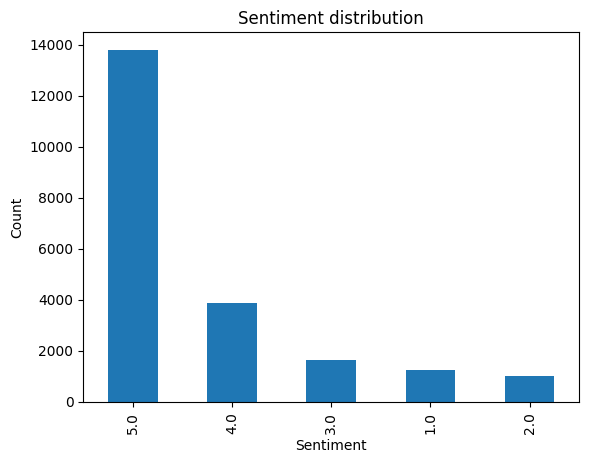

In [32]:
df_nike["overall"].value_counts().plot(kind='bar', title='Sentiment distribution', xlabel='Sentiment', ylabel='Count')


# Model Building

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle
import numpy as np


In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_nike['reviewText'], df_nike['overall'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17256,), (4314,), (17256,), (4314,))

In [65]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
x_train_vec = vectorizer.fit_transform(X_train)
print(vectorizer.vocabulary_)
pickle.dump(vectorizer, open("vectorizer.pickle", "wb")) # save vectorizer for reuse
x_vec = x_train_vec.todense()
x_test_vec = vectorizer.transform(X_test)
x_test_vec = x_test_vec.todense()

{'product': 653, 'close': 151, 'expected': 268, 'shipping': 747, 'shoe': 750, 'little': 475, 'heavier': 378, 'thought': 871, 'good': 349, 'run': 713, 'recommend': 688, 'shoes': 751, 'just': 437, 'advertised': 33, 'came': 124, 'quickly': 670, 'beat': 78, 'price': 646, 'broke': 110, 'hours': 402, 'casual': 130, 'played': 627, 'day': 206, 'comfortable': 163, 'problems': 652, 'happy': 370, 'watch': 947, 'great': 355, 'deal': 208, 'money': 532, 'spent': 801, '50': 16, 'need': 542, 'wish': 970, 'heart': 377, 'rate': 674, 'monitor': 533, 've': 928, 'like': 471, 'feature': 289, 'use': 921, 'haven': 373, 'options': 576, 'far': 284, 'numbers': 562, 'easy': 248, 'read': 676, 'band': 71, 'fits': 304, 'comfortably': 164, 'wrist': 990, 'fit': 303, 'leather': 459, 'walking': 937, 'grass': 353, 'doesn': 233, 'water': 949, 'socks': 786, 'favorite': 288, 'nike': 553, 'sneakers': 781, 'hands': 366, 'want': 940, 'order': 578, 'different': 224, 'colors': 156, 'waiting': 934, 'bit': 88, 'super': 842, 'comfy

In [76]:

x_vec = np.asarray(x_vec)
tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(x_vec)
X_tfidf = X_tfidf.todense()
X_tfidf=np.asarray(X_tfidf)


In [77]:
nb_model = MultinomialNB()
nb_model.fit(X_tfidf, y_train)

MultinomialNB()

# Evaluation   

In [80]:
# Assuming y_train and y_test are your target labels
y_train = y_train.astype(int)  

# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_tfidf, y_train)
x_test_vec = vectorizer.transform(X_test)
X_test_tfidf = tfidf.transform(x_test_vec)


y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"Accuracy (Multinomial Naive Bayes): {accuracy_nb:.2f}")
print("Classification Report:\n", report_nb)


Accuracy (Multinomial Naive Bayes): 0.67
Classification Report:
               precision    recall  f1-score   support

         1.0       0.67      0.17      0.27       253
         2.0       0.40      0.02      0.04       178
         3.0       0.29      0.02      0.03       342
         4.0       0.40      0.10      0.15       739
         5.0       0.68      0.98      0.81      2802

    accuracy                           0.67      4314
   macro avg       0.49      0.26      0.26      4314
weighted avg       0.59      0.67      0.57      4314



# Conclusion

It appears that our model is not very good at predicting the sentiment of a review. This is probably due to the fact that the dataset is imbalanced. We have a lot more positive reviews than negative reviews. We can try to balance the dataset by undersampling the positive reviews or oversampling the negative reviews. We can also try to use a different model such as a neural network. Addionally, we can try to use a different dataset that is more balanced and contains more information about the products. 
As, you can see our model achieved an accuracy of 0.67 and an F1 score of 0.80. This means that our model is 67% accurate and that it correctly predicted 80% of the positive reviews and 80% of the negative reviews.